<a href="https://colab.research.google.com/github/ridvanyigit/Natural-Language-Processing-NLP-/blob/main/Plotly_Crash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.io as pio
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')

pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
import sys
if 'google.colab' in sys.modules:
    !pip install plotly --upgrade
    !pip install nbformat

In [82]:
print(f"Plotly version: {py.__version__}")
print(f"Cufflinks version: {cf.__version__}")

Plotly version: 6.0.0
Cufflinks version: 0.17.3


In [83]:
df = pd.DataFrame()
help(df.iplot)

Help on method _iplot in module cufflinks.plotlytools:

_iplot(kind='scatter', data=None, layout=None, filename='', sharing=None, title='', xTitle='', yTitle='', zTitle='', theme=None, colors=None, colorscale=None, fill=False, width=None, dash='solid', mode='', interpolation='linear', symbol='circle', size=12, barmode='', sortbars=False, bargap=None, bargroupgap=None, bins=None, histnorm='', histfunc='count', orientation='v', boxpoints=False, annotations=None, keys=False, bestfit=False, bestfit_colors=None, mean=False, mean_colors=None, categories='', x='', y='', z='', text='', gridcolor=None, zerolinecolor=None, margin=None, labels=None, values=None, secondary_y='', secondary_y_title='', subplots=False, shape=None, error_x=None, error_y=None, error_type='data', locations=None, lon=None, lat=None, asFrame=False, asDates=False, asFigure=False, asImage=False, dimensions=None, asPlot=False, asUrl=False, online=None, **kwargs) method of pandas.core.frame.DataFrame instance
           Retur

##Create and Cumulatively Modify DataFrame

In [84]:
df = pd.DataFrame(np.random.randn(100, 3), columns=['A', 'B', 'C'])
print(df.head())

df['A'] = df['A'].cumsum() + 10
df['B'] = df['B'].cumsum() + 20
df['C'] = df['C'].cumsum() + 30
print(df.head())

          A         B         C
0 -2.955768  1.788079  0.531933
1  0.395900  1.445664  0.825379
2  2.751810  1.513782 -1.478396
3  0.052212  1.669021  0.689070
4  1.751066  1.703883  0.960734
           A          B          C
0   7.044232  21.788079  30.531933
1   7.440131  23.233743  31.357312
2  10.191942  24.747525  29.878916
3  10.244154  26.416545  30.567987
4  11.995220  28.120428  31.528720


##Line Chart

In [85]:
fig = go.Figure()
for col in df.columns:
    fig.add_trace(go.Scatter(y=df[col], mode='lines', name=col))
fig.show()

##Scatter Plot (A vs B)

In [86]:
fig = go.Figure(data=[go.Scatter(x=df['A'], y=df['B'], mode='markers')],
                 layout=go.Layout(title='Random Data'))
fig.show()

DataFrame Shape

In [87]:
df.shape

(100, 3)

Matplotlib Plot of DataFrame

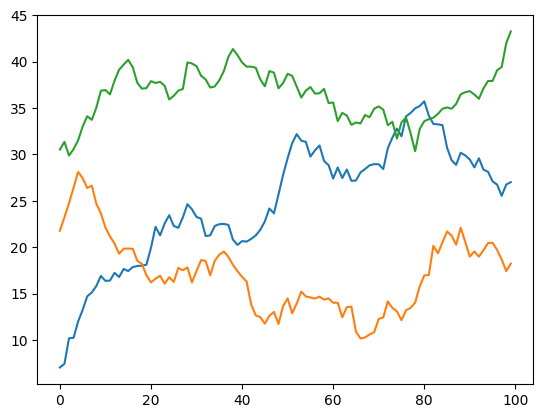

In [88]:
plt.plot(df)
plt.show()

##Scatter Plot (Size Adjusted)

In [89]:
fig = go.Figure(data=[go.Scatter(x=df['A'], y=df['B'], mode='markers', marker=dict(size=25))],
                 layout=go.Layout(title='Random Data'))
fig.show()

##Load and Clean Titanic Dataset

In [106]:
titanic = sns.load_dataset('titanic')
titanic.dropna(subset=['sex', 'survived'], inplace=True)

##Plotly Express Bar Chart

In [91]:
import plotly.express as px
fig = px.bar(titanic.groupby('sex')['survived'].mean().reset_index(),
             x='sex', y='survived', title='Survived')
fig.show()

##Cufflinks Theme Iteration

In [92]:
themes = ['ggplot', 'pearl', 'solar', 'space']
for theme in themes:
    cf.set_config_file(theme=theme)  # Cufflinks temasını ayarla (sadece renk şeması için)
    colorscale = cf.get_config_file()['colorscale']  # Temanın renk şemasını al

##Stacked Bar Chart with Theme

In [93]:
# Plotly ile bar grafiği oluşturma
fig = go.Figure(data=[go.Bar(y=df[col], name=col) for col in df.columns],
                layout=go.Layout(title=f'Bar Plot ({theme} Theme)', barmode='stack', bargap=0.5))

fig.show()

##Stacked Bar Chart


In [94]:
# Bar Grafiği
fig = go.Figure(data=[go.Bar(y=df[col], name=col) for col in df.columns],
                layout=go.Layout(title='Bar Grafiği', barmode='stack', bargap=0.5))
fig.show()

##Box Plot

In [107]:
fig = go.Figure(data=[go.Box(y=df[col], name=col) for col in df.columns],
                layout=go.Layout(title='Kutu Grafiği'))
fig.show()

##Area Chart

In [108]:
fig = go.Figure(data=[go.Scatter(y=df[col], name=col, stackgroup='1') for col in df.columns],
                layout=go.Layout(title='Alan Grafiği'))
fig.show()

##Filled Area Chart

In [97]:
fig = go.Figure(data=[go.Scatter(y=df[col], name=col, stackgroup='1', fill='tozeroy') for col in df.columns],
                layout=go.Layout(title='Doldurulmuş Alan Grafiği'))
fig.show()

Create DataFrame df3

In [98]:
df3 = pd.DataFrame({
    'X': [10,20,30,20,10],
    'Y': [10,20,30,20,10],
    'Z': [10,20,30,20,10]
})

##Surface Plot (df3)

In [99]:
fig = go.Figure(data=[go.Surface(z=df3.values)])
fig.show()

##Surface Plot (Sinwave)



In [109]:
df_sinwave = cf.datagen.sinwave(10, 0.25)
fig = go.Figure(data=[go.Surface(z=df_sinwave.values)])
fig.show()

##3D Scatter Plot

In [110]:
df_scatter3d = cf.datagen.scatter3d(2, 150, mode='stocks')
fig = go.Figure(data=[go.Scatter3d(x=df_scatter3d['x'], y=df_scatter3d['y'], z=df_scatter3d['z'], mode='markers')])
fig.show()

Recreate DataFrame

In [111]:
df = pd.DataFrame(np.random.randn(100, 3), columns=['A', 'B', 'C'])

##Grouped Histogram

In [112]:
fig = go.Figure()
for col in df.columns:
    fig.add_trace(go.Histogram(x=df[col], name=col))
fig.update_layout(barmode='group')
fig.show()

##3D Bubble Chart

In [113]:
df_bubble3d = cf.datagen.bubble3d(5, 4, mode='stocks')
fig = go.Figure(data=[go.Scatter3d(x=df_bubble3d['x'], y=df_bubble3d['y'], z=df_bubble3d['z'], mode='markers',
                                   marker=dict(size=df_bubble3d['size']))])
fig.show()

##Heatmap (Spectral Colorscale)

In [105]:
df_heatmap = cf.datagen.heatmap(20, 30)
fig = go.Figure(data=[go.Heatmap(z=df_heatmap.values, colorscale='spectral')],
                layout=go.Layout(title='cufflinks - heatmap'))
fig.show()